# Support Vector Machines (SVMs)

Resources for the mathematical derivation:

- [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)
- [16. Learning: Support Vector Machines](https://www.youtube.com/watch?v=_PwhiWxHK8o)
- [Support Vector Machines: All you need to know!](https://www.youtube.com/watch?v=ny1iZ5A8ilA)

---

- SVMs can be used for regression as well as classification.
- Purpose: ***Does a hyperplane exist that can effectively separate classes?***
- They are part of a family of algorithms: *Maximum Margin Classifiers* => *Support Vector Classifiers* => *Support Vector Machines*

## Maximum Margin Classifiers

Find the line that separates classes in the way that maximizes the distance between it and the "supporting" observations.

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/max_margin_classif.png">

## Support Vector Classifiers

Allow for a few misclassifications.

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/svc.png">

## Support Vector Machines

A function that adds a new dimension to the data is called a `kernel`.
SVMs use `kernels` to project the data to a higher dimension, in order to use a hyperplane in this higher dimension to separate the data.

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/svm_start.png">

After the addition of a new dimension, the data can be separated:

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/svm_end.png">

## The `kernel` trick

If you start digging in the theory of SVMs, you'll soon see the expression `the kernel trick`. The above two plots show how data points can be transformed from one dimension into a higher dimension. Mathematically, the kernel trick actually avoids recomputing the points in a higher dimensional space, but still managing to find a non-linear boundary!

## Can also be used for regression tasks.

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/svm_regression.png">

## Imports

> Note: Most likely you don't have the package `nltk` installed. You can install it with Python's package manager - `pip`:

```console
pip install nltk
```

# Task 1

In [165]:
# Add magic command to delete all saved variables

In [166]:
# Imports and constant values here

In [ ]:
# Uncomment and run this cell if this is your first time working with "nltk".
# This cell downloads the stemming rules used by the PorterStemmer

# import nltk
# nltk.download('punkt')

## Load data

Answer the following questions:
- What is a hyperplane in 1D?
- What is a hyperplane in 2D?
- What is a hyperplane in 3D?

In [167]:
# Load and display the `spam.csv` file from the GitHub repo and save it in a dataframe `df_spam`.

# `pd.read_csv` won't always work outside the box. Sometimes, the data is encoded in a different format
# usually the fix is to set the "encoding" parameter to "latin-1" 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [168]:
# Rename the "v1" column to "classif" and the "v2" column to "email_body"

,classif,email_body,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Exploratory data analysis

In [169]:
# Display a summary of the features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   classif     5572 non-null   object
 1   email_body  5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [170]:
# Display summary statistics.

,count,unique,top,freq
classif,5572,2,ham,4825
email_body,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [171]:
# What is the mean rate of missing value for each feature?

classif       0.000000
email_body    0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [172]:
# Check the distribution of the target feature.

,count,proportion
classif,,
ham,4825,0.865937
spam,747,0.134063


<Axes: ylabel='Frequency'>

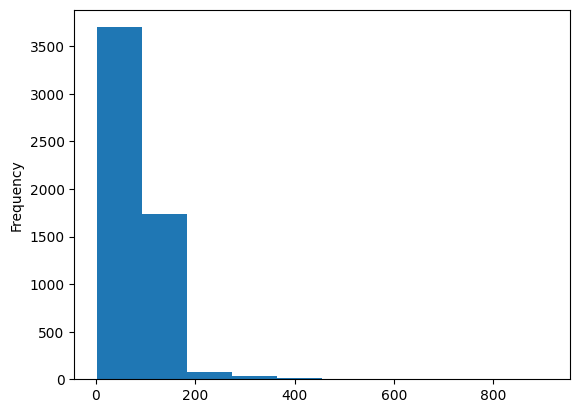

In [173]:
# What does the distribution of the length of the emails look like?

In [174]:
# What is the minimum, mean and maximum length an email could have?

Minimum: 2
Mean: 80.11880832735105
Maximum: 910


## Preprocessing

In [175]:
# Encode "ham" with 0 and "spam" with 1.

,classif,email_body,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [176]:
# Remove the last three columns.

,classif,email_body
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Task 2

Take an email string and convert it to a list of stemmed words.

Define a function `process_email` that executes the following algorithm on a string:

1. Convert to lower case.
2. Use the following regular expressions to clean the emails (you can use the `re.sub` function from the built-in `re` module):
   - replace all html tags with empty string using `<[^<>]+>`;
   - replace all numbers with the word "number" using `[0-9]+`;
   - replace all web links with the word "httpaddr" using `(http|https)://[^\s]*`;
   - replace all email addresses with the word "emailaddr" using `[^\s]+@[^\s]+`;
   - replace all email addresses with the word "dollar" using `[$]+`.
4. Tokenize the result using `nltk.tokenize.word_tokenize`.
5. Remove numbers and stem each word.
   - Use the `PorterStemmer` class to create an object and stem each word.
6. Filter out empty strings.

Apply this function on the example email to check your answer.

In [ ]:
def process_email(contents):
    pass


email = """> Anyone knows how much it costs to host a web portal?
>
Well, it depends on how many visitors you're expecting.add()
This can be anywhere from less than 10 bucks a month to a couple of $100.
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2
if youre running something big...

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com

"""

expected = ['>', 'anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a', 'web', 'portal', '?', '>', 'well', ',', 'it', 'depend', 'on', 'how', 'mani', 'visitor', 'you', "'re", 'expecting.add', '(', ')', 'thi', 'can', 'be', 'anywher', 'from', 'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a', 'coupl', 'of', 'dollarnumb', '.', 'you', 'should', 'checkout', 'httpaddr', 'or', 'perhap', 'amazon', 'ecnumb', 'if', 'your', 'run', 'someth', 'big', '...', 'to', 'unsubscrib', 'yourself', 'from', 'thi', 'mail', 'list', ',', 'send', 'an', 'email', 'to', ':', 'emailaddr']
actual = process_email(email)
assert actual == expected, 'Output does not match.'

['>',
 'anyon',
 'know',
 'how',
 'much',
 'it',
 'cost',
 'to',
 'host',
 'a',
 'web',
 'portal',
 '?',
 '>',
 'well',
 ',',
 'it',
 'depend',
 'on',
 'how',
 'mani',
 'visitor',
 'you',
 "'re",
 'expecting.add',
 '(',
 ')',
 'thi',
 'can',
 'be',
 'anywher',
 'from',
 'less',
 'than',
 'number',
 'buck',
 'a',
 'month',
 'to',
 'a',
 'coupl',
 'of',
 'dollarnumb',
 '.',
 'you',
 'should',
 'checkout',
 'httpaddr',
 'or',
 'perhap',
 'amazon',
 'ecnumb',
 'if',
 'your',
 'run',
 'someth',
 'big',
 '...',
 'to',
 'unsubscrib',
 'yourself',
 'from',
 'thi',
 'mail',
 'list',
 ',',
 'send',
 'an',
 'email',
 'to',
 ':',
 'emailaddr']

# Task 3

Take a list of emails and get a dictionary of the most common words.

A vocabulary of size `n` is the enumerated mapping of the `n` most common words.

Define a function `get_vocabulary` that accepts a list of email strings and an upper limit for the size of the vocabulary (mapping from index to words) and builds a vocabulary with that size.

In [178]:
def get_vocabulary(emails, vocab_length):
    pass


expected = {0: '.', 1: 'i', 2: 'number', 3: 'to', 4: 'you', 5: ',', 6: '?', 7: 'a', 8: '!', 9: 'the', 10: '...', 11: 'u', 12: 'and', 13: 'it', 14: '&', 15: 'is', 16: 'in', 17: 'me', 18: ';', 19: 'my', 20: ':'}
result = get_vocabulary(df_spam['email_body'], 2000)
actual = ... # get the first 20 elements from result
assert actual == expected, 'Output does not match.'

{0: '.',
 1: 'i',
 2: 'number',
 3: 'to',
 4: 'you',
 5: ',',
 6: '?',
 7: 'a',
 8: '!',
 9: 'the',
 10: '...',
 11: 'u',
 12: 'and',
 13: 'it',
 14: '&',
 15: 'is',
 16: 'in',
 17: 'me',
 18: ';',
 19: 'my',
 20: ':',
 21: 'for',
 22: 'your',
 23: '..',
 24: 'call',
 25: 'have',
 26: 'do',
 27: 'of',
 28: 'that',
 29: 'on',
 30: ')',
 31: "'s",
 32: 'now',
 33: 'are',
 34: 'so',
 35: 'go',
 36: 'get',
 37: 'not',
 38: 'but',
 39: 'be',
 40: 'or',
 41: 'can',
 42: 'at',
 43: 'we',
 44: "'m",
 45: 'will',
 46: 'if',
 47: 'ur',
 48: 'with',
 49: 'just',
 50: "n't",
 51: 'no',
 52: 'thi',
 53: 'how',
 54: 'gt',
 55: 'lt',
 56: '*',
 57: 'up',
 58: 'what',
 59: 'come',
 60: 'when',
 61: "''",
 62: '#',
 63: 'from',
 64: 'free',
 65: 'know',
 66: 'all',
 67: 'out',
 68: 'like',
 69: 'love',
 70: 'ok',
 71: 'got',
 72: 'time',
 73: 'wa',
 74: 'want',
 75: 'good',
 76: 'day',
 77: 'then',
 78: 'å£number',
 79: "'ll",
 80: 'there',
 81: '-',
 82: 'he',
 83: 'text',
 84: 'am',
 85: 'onli',
 86:

Define a function `get_indices` that returns the indices of words used in a given email using the vocabulary.

If a word is not present in the vocabulary, assign `None` for its index.

In [179]:
def get_indices(email, vocabulary):
    pass


expected = {0, 2, 3, 4, 5, 6, 7, 10, 13, 20, 22, 27, 29, 30, 39, 40, 41, 46, 52, 53, 63, 65, 86, 132, 142, 143, 152, 164, 177, 224, 261, 322, 346, 355, 369, 414, 463, 517, 554, 591, 609, 612, 628, 657, 817, 891, 986, 1056, 1095, 1226}
actual = ... # apply the function on the example email from above
assert actual == expected, 'Output does not match.'

Define a function `get_feature_vector` that takes word indices and a vocabulary size and returns a vector of the size of the vocabulary whose elements are equal to:

- `1` if the given element is in the index;
- `-1` otherwise.

In [ ]:
def get_feature_vector(word_indices, vocab_length):
    pass


test_indices = ... # get the indices of the words in the example email from above
get_feature_vector(test_indices, 2000)

array([ 1., -1.,  1., ..., -1., -1., -1.])

# Task 4

Create a variable `vocab_length` and set it to 2000.

Apply the `process_email` function to each email in the data to see what the outputs would look like when creating the vocabulary.

0       [go, until, jurong, point, ,, crazi, .., avail...
1                  [ok, lar, ..., joke, wif, u, oni, ...]
2       [free, entri, in, number, a, wkli, comp, to, w...
3       [u, dun, say, so, earli, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goe, to, usf, ,, ...
                              ...                        
5567    [thi, is, the, numbernd, time, we, have, tri, ...
5568         [will, ì_, b, go, to, esplanad, fr, home, ?]
5569    [piti, ,, *, wa, in, mood, for, that, ., so, ....
5570    [the, guy, did, some, bitch, but, i, act, like...
5571                    [rofl, ., it, true, to, it, name]
Name: email_body, Length: 5572, dtype: object

In [182]:
# Split into "X" and "y". "X" will be the matrix of feature vectors obtained for every email.

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: classif, Length: 5572, dtype: int64

In [183]:
# Display "X".

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,1,-1,1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,-1,1,-1,-1,1,-1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5568,-1,-1,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5569,1,-1,-1,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5570,-1,1,-1,1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [184]:
# Splint for training and test with 80% of the data used for training.

## Modelling

In [185]:
# Create a dataframe for storing the results from the experiments.

,experiment,accuracy,precision,recall,f1-score


### Random

In [186]:
# Evaluate random guessing.

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       960
           1       0.08      0.07      0.07       155

    accuracy                           0.75      1115
   macro avg       0.46      0.47      0.47      1115
weighted avg       0.74      0.75      0.75      1115



,experiment,accuracy,precision,recall,f1-score
0,random,0.753363,0.077465,0.070968,0.074074


### Most common

In [187]:
# Evaluate predicting the most common class.

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       960
           1       0.00      0.00      0.00       155

    accuracy                           0.86      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.74      0.86      0.80      1115



/home/work/Dev/private-ml/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/work/Dev/private-ml/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/work/Dev/private-ml/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

,experiment,accuracy,precision,recall,f1-score
0,random,0.753363,0.077465,0.070968,0.074074
1,most_frequent,0.860987,0.000000,0.000000,0.000000


### KNN

In [188]:
# Evaluate the K Nearest Neighbor algorithm.

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.60      0.75       155

    accuracy                           0.94      1115
   macro avg       0.97      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



,experiment,accuracy,precision,recall,f1-score
0,random,0.753363,0.077465,0.070968,0.074074
1,most_frequent,0.860987,0.000000,0.000000,0.000000
2,knn,0.944395,1.000000,0.600000,0.750000


### Logistic regression

In [189]:
# Evaluate the Logistic Regression algorithm.

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       960
           1       0.99      0.95      0.97       155

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



/home/work/Dev/private-ml/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,experiment,accuracy,precision,recall,f1-score
0,random,0.753363,0.077465,0.070968,0.074074
1,most_frequent,0.860987,0.000000,0.000000,0.000000
2,knn,0.944395,1.000000,0.600000,0.750000
3,log_reg,0.991928,0.986667,0.954839,0.970492


### Support Vector Classifier

In [ ]:
# Create and train a support vector machine.

# Note: In sklearn, the SVM is implemented as the SVC class
# and the SVC is implemented as the LinearSVC class.

SVC()

## Model evaluation

Answer the following questions:
- What is a confusion matrix?
- What is accuracy?
- What is accuracy in terms of the confusion matrix?
- When should accuracy be used?
- When shouldn't accuracy be used?
- What is precision?
- What is recall?
- What is the f1-score?

In [191]:
# Use the svm to obtain predictions.

array([1, 0, 0, ..., 0, 0, 0])

In [192]:
# Display the metrics.

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       960
           1       1.00      0.94      0.97       155

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [193]:
# Add the metrics to the table with results from your experiments.

,experiment,accuracy,precision,recall,f1-score
0,random,0.753363,0.077465,0.070968,0.074074
1,most_frequent,0.860987,0.000000,0.000000,0.000000
2,knn,0.944395,1.000000,0.600000,0.750000
3,log_reg,0.991928,0.986667,0.954839,0.970492
4,svc,0.991031,1.000000,0.935484,0.966667


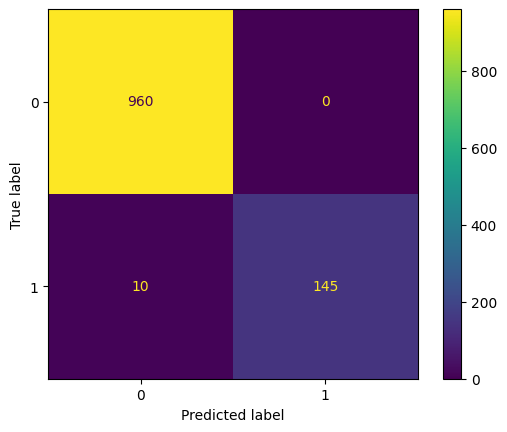

In [194]:
# Plot the confusion matrix.

# Feel free to look at the solutions for the previous week to see how this can be done.

Precision and Recall can hardly be maximized together.
- return 1 example from positive class => precision=1, recall~0
- return all examples => precision~(prob of positive class. if balanced 0.5), recall=1

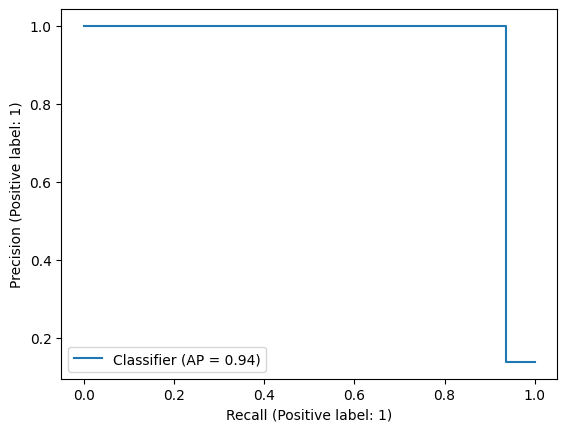

In [195]:
# Plot the precision recall curve.

# Feel free to look at the solutions for the previous week to see how this can be done.

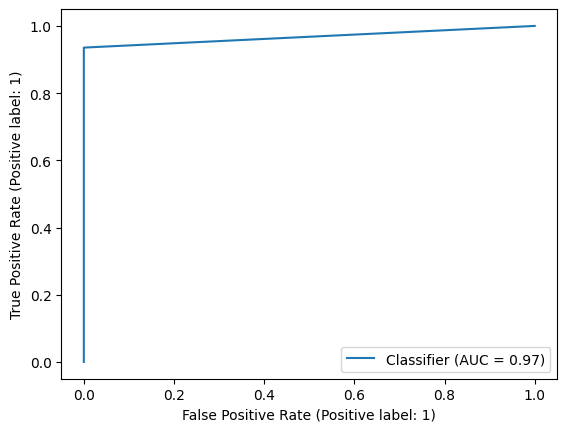

In [196]:
# Plot the receiver operator curve.

# Feel free to look at the solutions for the previous week to see how this can be done.

In [197]:
# Display the final results. Which model would you chose to give to the client?

,experiment,accuracy,precision,recall,f1-score
0,random,0.753363,0.077465,0.070968,0.074074
1,most_frequent,0.860987,0.000000,0.000000,0.000000
2,knn,0.944395,1.000000,0.600000,0.750000
3,log_reg,0.991928,0.986667,0.954839,0.970492
4,svc,0.991031,1.000000,0.935484,0.966667
